In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn 
import scipy as spa
import h5py
from utils import *
import sklearn


In [3]:
# load the data
locs_list, vel_list, edges_list = load_SLEAP()

locations.shape at start (1, 63033, 2, 2)
velocities.shape at start (1, 63033, 2, 2)
edges.shape at start (1, 2, 2)
batch_ready data shape:  (400, 50, 2, 2)
batch_ready data shape:  (120, 50, 2, 2)
batch_ready data shape:  (120, 50, 2, 2)
batch_ready data shape:  (400, 50, 2, 2)
batch_ready data shape:  (120, 50, 2, 2)
batch_ready data shape:  (120, 50, 2, 2)
formatted edges_train.shape (400, 2, 2)
formatted edges_valid.shape (120, 2, 2)
formatted edges_test.shape (120, 2, 2)


In [15]:
# positions
m1_loc = locs_list[0][:,:,:,0]
m2_loc = locs_list[0][:,:,:,1]

In [6]:
# velocities
vel_list[0].shape

(400, 50, 2, 2)

In [7]:
vel_list[0][:,:,:,0].shape

(400, 50, 2)

In [8]:
# want to predict mouse 2 future position from it's previous
m1_velocities = vel_list[0][:,:,:,0]
m2_velocities = vel_list[0][:,:,:,1]

In [ ]:
# Regression Model
from sklearn.linear_model import Ridge

# X: input features, shape (n_samples, n_features)
# y: target velocities, shape (n_samples, n_dims)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

preds = model.predict(X_test)


In [12]:
# Granger Causality

from statsmodels.tsa.stattools import grangercausalitytests

data = np.column_stack([m2_velocities, m1_velocities])


In [13]:
formatted_data = np.reshape(data, (40000,2))
grangercausalitytests(formatted_data, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0760  , p=0.1496  , df_denom=39996, df_num=1
ssr based chi2 test:   chi2=2.0761  , p=0.1496  , df=1
likelihood ratio test: chi2=2.0761  , p=0.1496  , df=1
parameter F test:         F=2.0760  , p=0.1496  , df_denom=39996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3820  , p=0.6825  , df_denom=39993, df_num=2
ssr based chi2 test:   chi2=0.7641  , p=0.6825  , df=2
likelihood ratio test: chi2=0.7641  , p=0.6825  , df=2
parameter F test:         F=0.3820  , p=0.6825  , df_denom=39993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1859  , p=0.9061  , df_denom=39990, df_num=3
ssr based chi2 test:   chi2=0.5577  , p=0.9061  , df=3
likelihood ratio test: chi2=0.5577  , p=0.9061  , df=3
parameter F test:         F=0.1859  , p=0.9061  , df_denom=39990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1665  

{np.int64(1): ({'ssr_ftest': (np.float64(2.075955576534351),
    np.float64(0.1496440264962739),
    np.float64(39996.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(2.076111288773815),
    np.float64(0.14962092928995901),
    np.int64(1)),
   'lrtest': (np.float64(2.076057411322836),
    np.float64(0.1496262122657476),
    np.int64(1)),
   'params_ftest': (np.float64(2.0759555765328415),
    np.float64(0.1496440264962739),
    np.float64(39996.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.3819901789378849),
    np.float64(0.6825042461833082),
    np.float64(39993.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.7640758721354998),
    np.float64(0.6824691625179111),
    np.int64(2)),
   'lrtest': (np.float64(0.7640685742080677),
    np.float64(0.6824716528276662),
    np.int64(2)),
   'params_ftest': (np.float64(0.3819901789363664),
    np.float64(0.6825042461863389),
    np.float64(39993.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],


So it looks like there is weak or no evidence of Granger causality in the velocities of the two mice. What about for their positions?

In [16]:
both_locs = np.column_stack([m2_loc, m1_loc])


In [17]:
both_locs.shape

(400, 100, 2)

In [18]:
formatted_locs = np.reshape(both_locs,(40000,2))

In [19]:
grangercausalitytests(formatted_locs, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2924  , p=0.0069  , df_denom=39996, df_num=1
ssr based chi2 test:   chi2=7.2930  , p=0.0069  , df=1
likelihood ratio test: chi2=7.2923  , p=0.0069  , df=1
parameter F test:         F=7.2924  , p=0.0069  , df_denom=39996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4459  , p=0.0319  , df_denom=39993, df_num=2
ssr based chi2 test:   chi2=6.8927  , p=0.0319  , df=2
likelihood ratio test: chi2=6.8921  , p=0.0319  , df=2
parameter F test:         F=3.4459  , p=0.0319  , df_denom=39993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1959  , p=0.0863  , df_denom=39990, df_num=3
ssr based chi2 test:   chi2=6.5889  , p=0.0862  , df=3
likelihood ratio test: chi2=6.5883  , p=0.0862  , df=3
parameter F test:         F=2.1959  , p=0.0863  , df_denom=39990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6403  

{np.int64(1): ({'ssr_ftest': (np.float64(7.292436513185142),
    np.float64(0.006927464143892631),
    np.float64(39996.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(7.292983500622374),
    np.float64(0.006922442232050848),
    np.int64(1)),
   'lrtest': (np.float64(7.292318719730247),
    np.float64(0.006925004159401942),
    np.int64(1)),
   'params_ftest': (np.float64(7.292436513187172),
    np.float64(0.006927464143892631),
    np.float64(39996.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(3.4459247363318077),
    np.float64(0.031884736651931936),
    np.float64(39993.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(6.892711104633293),
    np.float64(0.031861542768120914),
    np.int64(2)),
   'lrtest': (np.float64(6.892117274866905),
    np.float64(0.03187100433894138),
    np.int64(2)),
   'params_ftest': (np.float64(3.4459247363354173),
    np.float64(0.031884736651810845),
    np.float64(39993.0),
    2.0)},
   array([[0., 0., 1.

Ok now we're in business, the positions of the two mice seem to have some predictive influence over each other.

## K-Means Unsupervised model

Now let's implement a model to learn where interactions happen and maybe what types of interaction are present in the data

In [22]:
# get relative distances
formatted_locs.shape

(40000, 2)

In [24]:
loc2 = np.reshape(m2_loc,(400*50,2))
loc2.shape

(20000, 2)

In [25]:
loc1 = np.reshape(m1_loc,(400*50,2))
loc1.shape

(20000, 2)

In [27]:
rel_pos = loc2 - loc1
rel_pos.shape

(20000, 2)

In [28]:
rel_dist = np.linalg.norm(rel_pos, axis=1).reshape(-1,1)
rel_dist.shape

(20000, 1)

In [ ]:
# get relative velocities (bonus: for three types of clusters)

# then stack them

In [35]:
#define input X
X = rel_dist

In [36]:
# apply k-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters = 2  # could try more
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X)


In [39]:
np.unique(labels, return_counts=True)

(array([0, 1], dtype=int32), array([ 9679, 10321]))

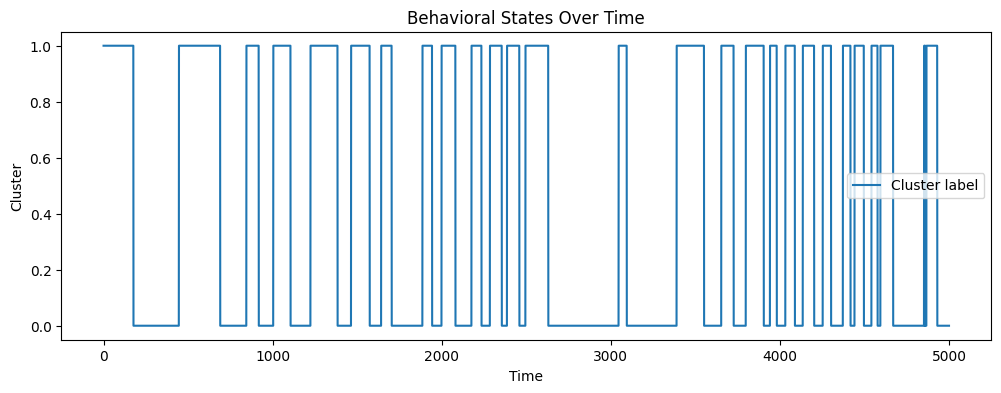

In [52]:
# visualise the clusters
plt.figure(figsize=(12, 4))
plt.plot(labels[:5000], label='Cluster label')
plt.xlabel('Time')
plt.ylabel('Cluster')
plt.title('Behavioral States Over Time')
plt.legend()
plt.show()

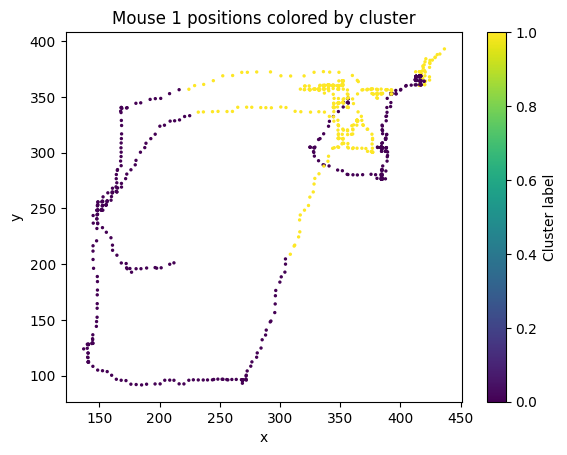

In [ ]:
# Mouse 1 locations coloured with interaction cluster label
# number of points to show
n = 1000

sc = plt.scatter(loc1[:n, 0], loc1[:n, 1], c=labels[:n], cmap='viridis', s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mouse 1 positions colored by cluster')
plt.colorbar(sc, label = "Cluster label")
plt.show()


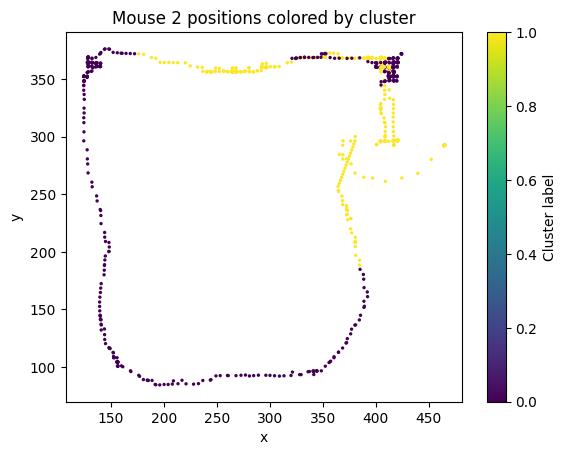

In [50]:
# Mouse 2 1 locations coloured with interaction cluster label
n = 1000

sc = plt.scatter(loc2[:n, 0], loc2[:n, 1], c=labels[:n], cmap='viridis', s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mouse 2 positions colored by cluster')
plt.colorbar(sc, label = "Cluster label")
plt.show()

In [48]:
# analyse the clusters
import pandas as pd

df = pd.DataFrame(X, columns=['rel_dist'])
df['cluster'] = labels
print(df.groupby('cluster').mean())


           rel_dist
cluster            
0        260.479844
1        107.720711
